# How SGD works?

In [1]:
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random
# Include some special libraries to create animation
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error

# Check our data

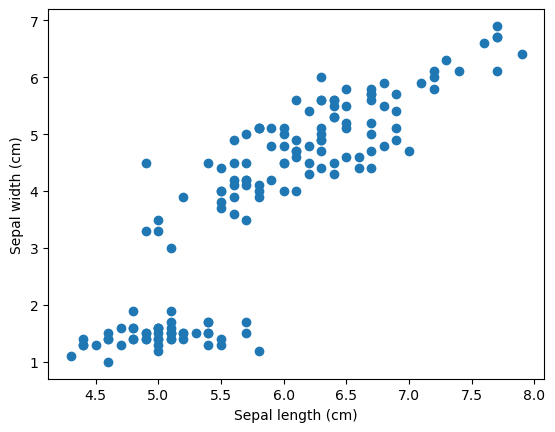

In [5]:
# Extract data, X,y 
# X should be 'sepal_length'
# y should be 'sepal_width'
data = load_iris()
sepal_length = data.data[:,0].reshape(-1,1) # X
sepal_width = data.data[:,2] # y

# Here you can check the behavior of your data
plt.plot(sepal_length,sepal_width,'o')
plt.ylabel('Sepal width (cm)')
plt.xlabel('Sepal length (cm)')
plt.show()

# Train a model and predict in our data

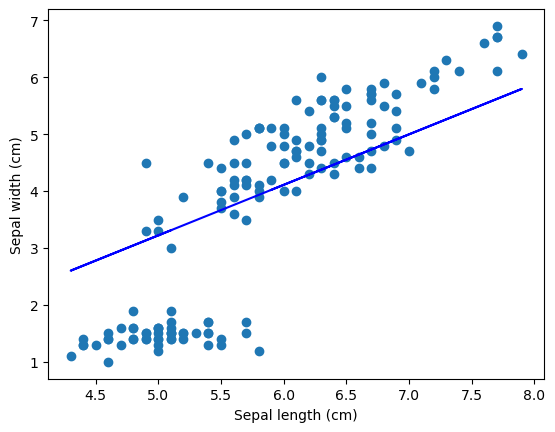

In [6]:
# We can create a linear model using SGD
model = SGDRegressor()
model.fit(sepal_length,sepal_width)
prediction = model.predict(sepal_length)

# We can plot our results
plt.plot(sepal_length,sepal_width,'o')
plt.plot(sepal_length,prediction,'b')
plt.ylabel('Sepal width (cm)')
plt.xlabel('Sepal length (cm)')
plt.show()

In [19]:
# Check the number of iterations
model.n_iter_

39

# Now, we can see what happens behind the SGD process

In [20]:
# Now, we can see the iterative process step by step
sgd_model = SGDRegressor(warm_start=True, eta0=0.001) 

# Create animation
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

# We go to create two plot in one figure
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)
# Save values of our loss functions
loss_values = []
iterations = []

# Create the plot
def plot(i,axes = [4, 10, 0, 8],axes2 = [0, 30, 0, 1500]):
    # Clear previous plot
    ax1.clear()
    # Plot the points
    ax1.scatter(sepal_length, sepal_width)
    # Select a sample of point
    n_sample = 20
    sample = random.sample(range(0, sepal_length.shape[0]), n_sample) 
    # Train the model considering previous training
    sgd_model.partial_fit(sepal_length[sample],sepal_width[sample])
    # Extract b0 and b1 parameters of a linear regression
    b0, b1 = sgd_model.intercept_[0], sgd_model.coef_[0]
    ax1.plot(sepal_length,b0+ sepal_length*b1,'b')
    ax1.set_title(f"Iteration {i+1} - SGD Regressor", fontsize=14)
    ax1.set_xlabel("Sepal Length", fontsize=14)
    ax1.set_ylabel("Sepal Width", fontsize=14)
    ax1.text(7, 0.5, f'Pred Width = {round(b0,2)}+{round(b1,2)}*Lenght', fontsize = 8,bbox = dict(facecolor = 'red', alpha = 0.5))
    ax1.axis(axes)
    # Get loss function. By default is the 'squared error'
    loss = np.sum(np.square(sepal_width - sgd_model.predict(sepal_length)))
    loss_values.append(loss)
    iterations.append(i+1)
    ax2.plot(iterations,loss_values,'r')
    ax2.set_xlabel("Iteration", fontsize=14)
    ax2.set_ylabel("Loss/Cost function", fontsize=14)
    ax2.set_title(f"Iteration {i+1} - Loss function evolution", fontsize=14)
    ax2.text(14, 1400, f'Loss (sum of squared error) = {round(loss,2)}', fontsize = 8, bbox = dict(facecolor = 'red', alpha = 0.5))
    ax2.axis(axes2)
    return ax1, ax2

# Create animation
anim = animation.FuncAnimation(fig, plot, frames=30, interval=300)
plt.close()
anim

In [21]:
# if this does not work in your computer, try: conda install -c conda-forge ffmpeg

# If you still have problems, you can go the needed libraries from here
# https://www.hostinger.com/tutorials/how-to-install-ffmpeg